# Лабораторная работа №3: Регрессионный анализ
### Выполнила студентка гр. 1384 Шиняева Анастасия. Вариант №22

## Цель работы
### Ознакомиться с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
### Регрессионная модель:

### $\mathbb{E}(Y|z)=f_{\theta}(z)$

### Метод наименьших квадратов:

### $RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$

### Нормальные уравнения:

### $XX^\intercal\beta=XY$

### Решение системы нормальных уравнений в регулярном случае:

### $\hat{\beta}=(XX^\intercal)^{-1}XY$

### Оценка параметра $\sigma^2$

### $s^2 \frac{RSS(\widehat\beta)}{n-r}=\frac{SSe}{n-r}$

### Доверительный эллипс для параметра $(\beta_0, \beta_1)$:

### ДНО-функция:

### $\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$

### МНК оценка:

### $\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$

### Доверительный эллипс:$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$

### $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

### F - статистика:

### $\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $

## Постановка задачи
### Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import numpy as np
from numpy import linalg as LA
import seaborn as sns
from scipy import stats
from scipy import optimize as opt
import matplotlib.pyplot as plt

In [ ]:
N = np.array([x for x in range(50)])
Y = np.array([22.06, 20.00, 21.08, 18.80, 9.74, 7.90, 14.16, 9.11, 23.14, 28.09, 13.46, 22.07, 10.43, 19.74, 23.41, 9.20, 9.79,
              3.91, 0.78, 3.68, 5.53, 1.67, 13.19, 11.03, 29.36, 24.56, 18.02, 9.29, 15.77, 12.41, 2.45, 8.77, 8.98, 5.32,
              31.24, 4.40, 13.64, 21.16, 11.66, 20.79, 11.64, 12.98, 7.25, 16.59, 8.97, 33.08, 15.01, 14.14, 12.75, 16.51])
raw_X = np.array([3, 9, 7, 7, 2, 7, 6, 9, 2, 8, 2, 8, 1, 9, 5, 0, 0,
                  6, 8, 2, 3, 2, 5, 4, 4, 4, 3, 3, 3, 4, 1, 0, 6, 6,
                  2, 3, 6, 6, 9, 0, 8, 7, 5, 4, 7, 5, 7, 9, 3, 8])

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

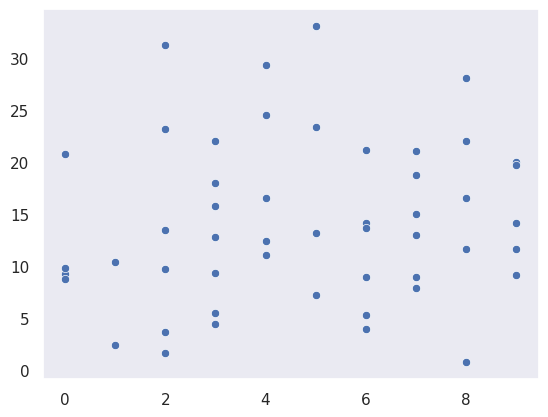

In [ ]:
sns.scatterplot(x=raw_X, y=Y)
None

### Формулировка Модели
### $Y = X\beta +\varepsilon$
### или
### $\begin{pmatrix} y_{1}\\ y_{2}\\ \vdots\\ y_{50} \end{pmatrix} = \begin{pmatrix} 1 & x_{1}\\ 1 & x_{2}\\ \vdots  & \vdots\\ 1 & x_{50} \end{pmatrix}  \begin{pmatrix} \beta_0\\ \beta_1 \end{pmatrix} + \begin{pmatrix} \varepsilon_{1}\\ \varepsilon_{2}\\ \vdots\\ \varepsilon_{50} \end{pmatrix}$

### Чтобы оценить параметры по МНК, воспользуемся следующей формулой:
### $\hat{\beta}=(X^TX)^{-1}X^TY$

In [ ]:
X = np.array([[1, x] for x in raw_X])
X[:5]

array([[1, 3],
       [1, 9],
       [1, 7],
       [1, 7],
       [1, 2]])

In [ ]:
est_beta = LA.inv(X.T @ X) @ X.T @ Y
est_bias = est_beta[0]
est_scale = est_beta[1]
est_beta

array([12.5073227 ,  0.35018431])

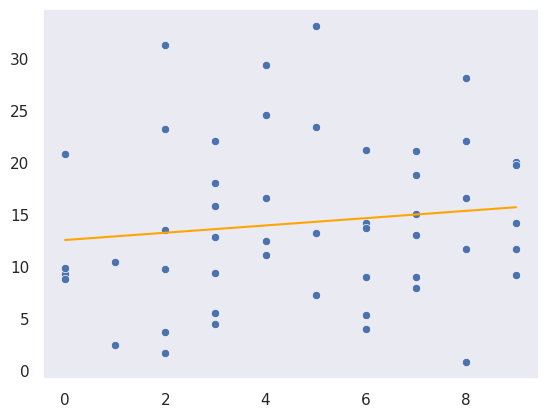

In [ ]:
sns.scatterplot(x=raw_X, y=Y)
sns.lineplot(x=[x for x in range(10)], y=[est_scale * x + est_bias for x in range(10)], color="orange")
None

### Визуально, данные не соответствуют оценке, такие данные вообще нельзя оценивать линейной регрессией, в надежде получить хорошую оценку

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 1.1$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.05$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

### Чтобы построить несмещенную оценку дисперсии воспользуемся следующей формулой:
### $\hat{S^2} = \frac{||Y-X^T\beta||}{n-r} $

In [ ]:
n = 50
r = 2 # regressors

In [ ]:
unbiased_var_est = LA.norm(Y - X @ est_beta)**2/(n-r)
unbiased_var_est

61.405044279029234

### Интерпретация: Дисперсия ошибок велика, что может свидетельствовать о том, что модель плохо подходит под данные

### Вектор ошибок

In [ ]:
errs = Y - X @ est_beta
errs

array([  8.50212438,   4.34101854,   6.12138715,   3.84138715,
        -3.46769131,  -7.05861285,  -0.44842854,  -6.54898146,
         9.93230869,  12.78120285,   0.25230869,   6.76120285,
        -2.42750701,   4.08101854,   9.15175577,  -3.3073227 ,
        -2.7173227 , -10.69842854, -14.52879715,  -9.52769131,
        -8.02787562, -11.53769131,  -1.06824423,  -2.87805993,
        15.45194007,  10.65194007,   4.46212438,  -4.26787562,
         2.21212438,  -1.49805993, -10.40750701,  -3.7373227 ,
        -5.62842854,  -9.28842854,  18.03230869,  -9.15787562,
        -0.96842854,   6.55157146,  -3.99898146,   8.2826773 ,
        -3.66879715,  -1.97861285,  -7.00824423,   2.68194007,
        -5.98861285,  18.82175577,   0.05138715,  -1.51898146,
        -0.80787562,   1.20120285])

In [ ]:
variational_series = errs
variational_series.sort()
variational_series

array([-14.52879715, -11.53769131, -10.69842854, -10.40750701,
        -9.52769131,  -9.28842854,  -9.15787562,  -8.02787562,
        -7.05861285,  -7.00824423,  -6.54898146,  -5.98861285,
        -5.62842854,  -4.26787562,  -3.99898146,  -3.7373227 ,
        -3.66879715,  -3.46769131,  -3.3073227 ,  -2.87805993,
        -2.7173227 ,  -2.42750701,  -1.97861285,  -1.51898146,
        -1.49805993,  -1.06824423,  -0.96842854,  -0.80787562,
        -0.44842854,   0.05138715,   0.25230869,   1.20120285,
         2.21212438,   2.68194007,   3.84138715,   4.08101854,
         4.34101854,   4.46212438,   6.12138715,   6.55157146,
         6.76120285,   8.2826773 ,   8.50212438,   9.15175577,
         9.93230869,  10.65194007,  12.78120285,  15.45194007,
        18.03230869,  18.82175577])

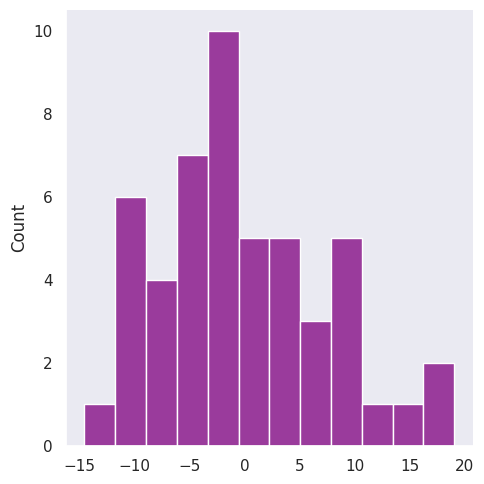

In [ ]:
sns.set(style='dark',)
sns.displot(variational_series, binwidth=2.8, color='purple')
None

In [ ]:
intervals = [[["-inf", -9.4], 7],
            [[-9.4, -3.8], 11],
            [[-3.8, -1], 10],
            [[-1, 1.8], 5],
            [[1.8, 7.4], 8],
            [[7.4, "inf"], 9]]
intervals

[[['-inf', -9.4], 7],
 [[-9.4, -3.8], 11],
 [[-3.8, -1], 10],
 [[-1, 1.8], 5],
 [[1.8, 7.4], 8],
 [[7.4, 'inf'], 9]]

In [ ]:
def chi24norm(params):
    theoretical_values=[[["-inf", -9.4], 7],
            [[-9.4, -3.8], 11],
            [[-3.8, -1], 10],
            [[-1, 1.8], 5],
            [[1.8, 7.4], 8],
            [[7.4, "inf"], 9]]
    for i in range(1, len(theoretical_values)-1):
        theoretical_values[i].append(stats.norm.cdf(theoretical_values[i][0][1], loc=params[0], scale=params[1]) - stats.norm.cdf(theoretical_values[i][0][0], loc=params[0], scale=params[1]))
    theoretical_values[-1].append(1 - stats.norm.cdf(x=7.4, loc=params[0], scale=params[1]))
    theoretical_values[0].append(stats.norm.cdf(x=-9.4, loc=params[0], scale=params[1]))

    obs = [7, 11, 10, 5, 8, 9]
    n = 50
    chi2 = 0
    for i in range(len(theoretical_values)):
        chi2 += (obs[i] - n * theoretical_values[i][1])**2/(n*theoretical_values[i][1])
    return chi2

In [ ]:
opt.minimize(x0=[1, 10], fun=chi24norm, bounds=[(None, None),(0, None)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 8.64365267514633
        x: [-1.341e+00  7.587e+00]
      nit: 7
      jac: [-2.665e-06 -1.776e-07]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### $\chi^2_{est} \approx 8.64 > \chi^2_{crit} = \chi^2_{3} \approx 4.642$
### Гипотезу нормальности стоит отклонить

###Колмогоров

In [ ]:
ECDF = lambda x: len(errs[errs <= x])/len(errs)
def KS(params):
    D = max([abs(stats.norm.cdf(x, loc=params[0], scale=params[1]) - ECDF(x)) for x in errs])
    return D * pow(n, 0.5)

In [ ]:
opt.minimize(x0=[1, 10], fun=KS, bounds=[(None, None),(0, None)])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.37180244291356906
        x: [-1.021e+00  7.501e+00]
      nit: 25
      jac: [-3.549e-02 -7.030e-02]
     nfev: 438
     njev: 146
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Оценка расстояния: 0.37

### $D(X) = sup|F_n(x)-F(x)|$
### $\sqrt{n}D(X) \overset{d}{\rightarrow} Y \sim K$

### $  K(C_{\alpha_2})=1-\alpha_2=1-0.2=0.8$
### $C_{\alpha_2}=C_{0.2}= 0.1489$
### $ \sqrt{n}D = 2.61 > 0.1489  $
### Гипотезу о нормальности стоит отклонить

In [ ]:
errs.sort()
errs

array([-14.52879715, -11.53769131, -10.69842854, -10.40750701,
        -9.52769131,  -9.28842854,  -9.15787562,  -8.02787562,
        -7.05861285,  -7.00824423,  -6.54898146,  -5.98861285,
        -5.62842854,  -4.26787562,  -3.99898146,  -3.7373227 ,
        -3.66879715,  -3.46769131,  -3.3073227 ,  -2.87805993,
        -2.7173227 ,  -2.42750701,  -1.97861285,  -1.51898146,
        -1.49805993,  -1.06824423,  -0.96842854,  -0.80787562,
        -0.44842854,   0.05138715,   0.25230869,   1.20120285,
         2.21212438,   2.68194007,   3.84138715,   4.08101854,
         4.34101854,   4.46212438,   6.12138715,   6.55157146,
         6.76120285,   8.2826773 ,   8.50212438,   9.15175577,
         9.93230869,  10.65194007,  12.78120285,  15.45194007,
        18.03230869,  18.82175577])

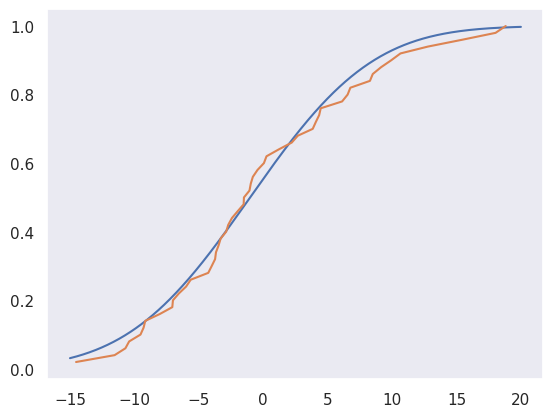

In [ ]:
px = np.linspace(-15, 20, 1000)
plt.plot(np.linspace(-15, 20, 1000), stats.norm.cdf(px, loc=-1.021, scale=7.501))
plt.plot(errs, [ECDF(err) for err in errs])

### Если оценивать расстояние визуально, то вывод совпадает с рассчетным

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

### Найдем доверительный интервал для $\beta_0$.
### ${\displaystyle \operatorname {Var} ({\hat {\beta }}_{j})=\sigma ^{2}\left(\left[X^{\mathsf {T}}X\right]^{-1}\right)_{jj}\approx {\hat {\sigma }}^{2}C_{jj},}$
### $C=(X^TX)^{-1}$
### $\hat{\beta}\sim \mathcal{N}(\beta, C\cdotσ^2)$
### $\hat{\beta_0}\sim \mathcal{N}(\beta_0, C_{[1,1]}\cdotσ^2)$
### $Z =\frac{\hat{\beta_0}-\beta_0}{\sqrt{C_{[1,1]}\cdotσ^2}}\sim \mathcal{N}(0, 1)$
### $ U = \frac{(n-r)\cdot \hat{\sigma}^2}{σ^2}= \frac{(n-r)\cdot S^2}{σ^2}\sim χ^2_{n-r}$
### $T=\dfrac{Z}{\sqrt{U/r}} = \frac{\frac{\hat{\beta_0}-\beta_0}{\sqrt{C_{[1,1]}\cdotσ^2}}}{\sqrt{\frac{1}{n-r}\cdot \frac{(n-r)⋅ S^2}{σ^2}}}\sim t_{n-r}$
### <center> $\frac{\hat{\beta_0}-\beta_0}{\sqrt{C_{[1,1]}\cdot S^2}}\sim t_{n-r}$



### $P(-t_{α/2}<\frac{\hat{\beta_0}-\beta_0}{\sqrt{C_{[1,1]}\cdot S^2}}<t_{α/2})=1-α$
### $P(\hat{\beta_0}-t_{1 -α/2}\sqrt{C_{[1,1]}\cdot S^2}<\beta_0<\hat{\beta_0}+t_{α/2}\sqrt{C_{[1,1]}\cdot S^2})=1-α$
### $P(9.61<\beta_0< 15.41)=0.80$





In [ ]:
sl = 0.2
n = 50
r = 2

In [ ]:
[est_beta[0] - stats.t.ppf(1-sl/2 , df=(n-r)) * pow(LA.inv(X.T @ X)[0][0] * unbiased_var_est, 0.5),
 est_beta[0] + stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[0][0] * unbiased_var_est, 0.5)]


[9.60838009340932, 15.406265304305709]

### $P(-t_{α/2}<\frac{\hat{\beta_1}-\beta_1}{\sqrt{C_{[2,2]}\cdot S^2}}<t_{α/2})=1-α$
### $P(\hat{\beta_1}-t_{α/2}\sqrt{C_{[2,2]}\cdot S^2}<\beta_1<\hat{\beta_1}+t_{α/2}\sqrt{C_{[2,2]}\cdot S^2})=1-α$
### $P(-0.18<\beta_1< 0.88)=0.80$

In [ ]:
[est_beta[1] - stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[1][1] * unbiased_var_est, 0.5),
 est_beta[1] + stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[1][1] * unbiased_var_est, 0.5)]


[-0.17838349115802427, 0.878752105083439]

In [ ]:
C = np.array([[1,0],[0,1]])
C

array([[1, 0],
       [0, 1]])

### $\Psi = C^T\beta$
### $C = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
### $\hat{\Psi} = C^T\hat{\beta} \sim \mathcal{N}(\Psi, \sigma^2C^T(XX^T)^{-1}C)$

### $(\widehat{Ψ}-Ψ)^T(C^T(XX^T)^{-1}C)^{-1}(\widehat{Ψ}-Ψ)\leq qS^2x_{α} $
### $(\widehat{Ψ}-Ψ)^T(C^T(XX^T)^{-1}C)^{-1}(\widehat{Ψ}-Ψ) = \lambda_1x^2 + \lambda_2y^2$
### $\frac{\lambda_1x^2 + \lambda_2y^2}{qS^2} < x_\alpha$
### $ x^2\frac{\lambda_1}{qS^2x_\alpha} + y^2\frac{\lambda_2}{qS^2x_\alpha}< 1$
### $ 0.26 \cdot x^2 + 9.37 \cdot y^2< 1$


### Полуоси: 1.96 и 0.32

In [ ]:
pow(1/0.26, 0.5)

1.9611613513818402

In [ ]:
pow(1/9.37, 0.5)

0.3266857601924006

In [ ]:
LA.eig(X.T @ X)

(array([  12.03398768, 1541.96601232]),
 array([[-0.98751431, -0.15752933],
        [ 0.15752933, -0.98751431]]))

In [ ]:
[ 11.91347953 /(LA.norm(Y - X @ est_beta)* stats.norm.ppf(0.8)), 428.08652047 /(LA.norm(Y - X @ est_beta) * stats.norm.ppf(0.8))]

[0.2607349777258155, 9.368978147685397]

### 4. Сформулировать гипотезу независимой переменной Y от переменной X. Провести проверку зависимости.

### Проверим гипотезу о независимости

### $H_0: \beta_1 = 0$
### $H_A: \beta_1 \neq 0$

### $F = \frac{\widehat{Ψ}^T(C^T(XX^T)^{-1}C)^{-1}\widehat{Ψ}}{qS^2}$

In [ ]:
q = 1
C = np.array([[0], [1]]).T
print(((est_beta[1] * LA.inv(C @ LA.inv(X.T @ X) @ C.T) * est_beta[1]) / (q * LA.norm(Y - X @ est_beta)**2)) < stats.f.ppf(0.8, 1, 49))


[[ True]]


### Гипотезу о независимости стоит принять

### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров сдвига $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

### Обновленная модель:
### $\begin{pmatrix} y_{1}\\ y_{2}\\ \vdots\\ y_{50} \end{pmatrix} = \begin{pmatrix} 1 & x_{1} & x^2_{1}\\ 1 & x_{2} & x^2_{2}\\ \vdots  & \vdots & \vdots\\ 1 & x_{50} & x^2_{50} \end{pmatrix} \begin{pmatrix} \beta_0\\ \beta_1\\ \beta_2 \end{pmatrix} + \begin{pmatrix} \varepsilon_{1}\\ \varepsilon_{2}\\ \vdots\\ \varepsilon_{50} \end{pmatrix}$

In [ ]:
X = np.array([[1, x,  x**2] for x in raw_X])
X[:5]

array([[ 1,  3,  9],
       [ 1,  9, 81],
       [ 1,  7, 49],
       [ 1,  7, 49],
       [ 1,  2,  4]])

In [ ]:
est_beta = LA.inv(X.T @ X) @ X.T @ Y
est_bias = est_beta[0]
est_scale = est_beta[1]
est_scale2 = est_beta[2]
est_beta

array([10.81026258,  1.45745924, -0.11880215])

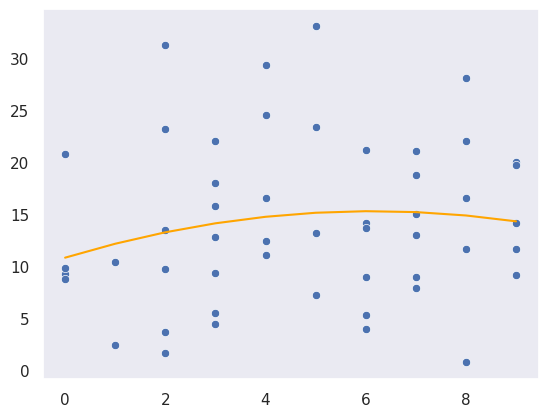

In [ ]:
sns.scatterplot(x=raw_X, y=Y)
sns.lineplot(x=[x for x in range(10)], y=[(x**2) * est_scale2 + est_scale * x + est_bias for x in range(10)], color="orange")
None

### 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

### Оценка дисперсии

In [ ]:
n = 50
r = 3 # regressors
unbiased_var_est = LA.norm(Y - X @ est_beta)**2/(n-r)
unbiased_var_est

61.98090059356504

### Интерпретация: Дисперсия стала еще больше, что может свидетельствовать о том, что модель еще хуже подходит под данные

In [ ]:
errs = Y - X @ est_beta
variational_series = errs.copy()
variational_series.sort()
variational_series

array([-14.08659912, -11.57997248, -11.36814075,  -9.95814075,
        -9.71342099,  -9.69891968,  -9.56997248,  -8.58342099,
        -7.87750513,  -7.29117208,  -6.29814075,  -6.22117208,
        -5.19442187,  -4.82342099,  -3.70926521,  -3.50997248,
        -3.22659912,  -2.64442187,  -2.32926521,  -2.21117208,
        -2.04026258,  -1.93750513,  -1.71891968,  -1.63814075,
        -1.61026258,  -1.36342099,  -1.11814075,  -1.02026258,
        -0.18117208,  -0.16442187,   0.21002752,   1.64340088,
         1.65657901,   1.85073479,   3.60882792,   3.90657901,
         5.43557813,   5.69557813,   5.88185925,   5.88882792,
         7.20340088,   7.94657901,   8.28249487,   9.82073479,
         9.89002752,   9.97973742,  13.22340088,  14.62073479,
        17.95249487,  17.99002752])

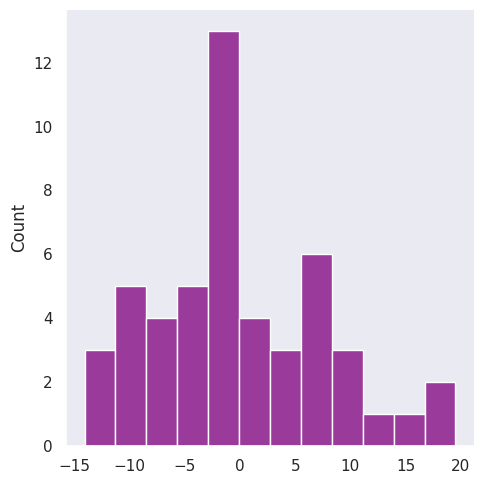

In [ ]:
sns.set(style='dark',)
sns.displot(variational_series, binwidth=2.8, color='purple')
None

In [ ]:
intervals = [[["-inf", -9.4], 8],
            [[-9.4, -3.8], 9],
            [[-3.8, -1], 13],
            [[-1, 4.6], 7],
             [[4.6, 7.4], 6],
            [[7.4, "inf"], 7]]
intervals

[[['-inf', -9.4], 8],
 [[-9.4, -3.8], 9],
 [[-3.8, -1], 13],
 [[-1, 4.6], 7],
 [[4.6, 7.4], 6],
 [[7.4, 'inf'], 7]]

In [ ]:
def chi24norm(params):
    theoretical_values= [[["-inf", -9.4]],
            [[-9.4, -3.8]],
            [[-3.8, -1]],
            [[-1, 4.6]],
             [[4.6, 7.4]],
            [[7.4, "inf"]]]
    for i in range(1, len(theoretical_values)-1):
        theoretical_values[i].append(stats.norm.cdf(theoretical_values[i][0][1], loc=params[0], scale=params[1]) - stats.norm.cdf(theoretical_values[i][0][0], loc=params[0], scale=params[1]))
    theoretical_values[-1].append(1 - stats.norm.cdf(x=7.4, loc=params[0], scale=params[1]))
    theoretical_values[0].append(stats.norm.cdf(x=-9.4, loc=params[0], scale=params[1]))

    obs = [8, 9, 13, 7, 6, 7]
    n = 50
    chi2 = 0
    for i in range(len(theoretical_values)):
        chi2 += (obs[i] - n * theoretical_values[i][1])**2/(n*theoretical_values[i][1])
    return chi2

In [ ]:
opt.minimize(x0=[1, 10], fun=chi24norm, bounds=[(None, None),(0, None)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 8.64365267514633
        x: [-1.341e+00  7.587e+00]
      nit: 7
      jac: [-2.665e-06 -1.776e-07]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### $\chi^2_{est} \approx 8.64 < \chi^2_{crit} = \chi^2_{3} \approx 4.642$
### Гипотезу нормальности стоит отклонить

### Гипотезу стоит отклонить

### Колмогоров

In [ ]:
ECDF = lambda x: len(errs[errs <= x])/len(errs)
def KS(params):
    D = max([abs(stats.norm.cdf(x, loc=params[0], scale=params[1]) - ECDF(x)) for x in errs])
    return D * pow(n, 0.5)

In [ ]:
opt.minimize(x0=[0, 0.33], fun=KS, bounds=[(None, None),(0, None)])

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.439404590886105
        x: [-1.026e+00  7.608e+00]
      nit: 14
      jac: [-2.585e-01  7.742e-02]
     nfev: 222
     njev: 74
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### Оценка расстояния: 0.43

### $D(X) = sup|F_n(x)-F_0(x)|$
### $\sqrt{n}D(X) \overset{d}{\rightarrow} Y \sim K$

### $  K(C_{\alpha_2})=1-\alpha_2=1-0.2=0.8$
### $C_{\alpha_2}=C_{0.1}= 0.1489	$
### $ \sqrt{n}D = 3.041 > 0.1489  $

### Гипотезу нормальности стоит отклонить

In [ ]:
errs.sort()

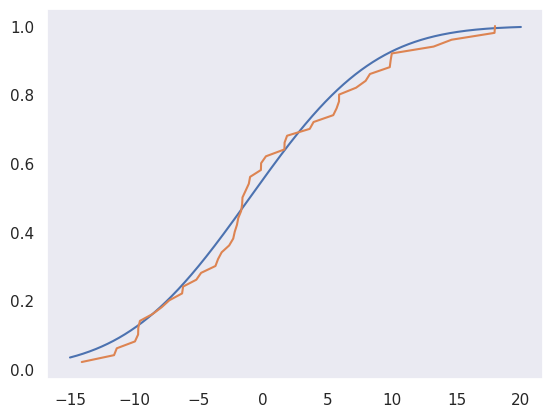

In [ ]:
px = np.linspace(-15, 20, 1000)
plt.plot(np.linspace(-15, 20, 1000), stats.norm.cdf(px, loc=-1.026, scale=7.608))
plt.plot(errs, [ECDF(err) for err in errs])

### Если оценивать расстояние визуально, то вывод совпадает с рассчетным

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$.

###$P(-t_{α/2}<\frac{\hat{\beta_0}-\beta_0}{\sqrt{C_{[1,1]}\cdot S^2}}<t_{α/2})=1-α$
###$P(\hat{\beta_0}-t_{α/2}\sqrt{C_{[1,1]}\cdot S^2}<\beta_0<\hat{\beta_0}+t_{α/2}\sqrt{C_{[1,1]}\cdot S^2})=1-α$
###$P(10.24<\beta_0< 11.37)=0.80$

In [ ]:
sl = 0.2
n = 50
r = 3

In [ ]:
[est_beta[0] - stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[0][0] * unbiased_var_est, 0.5),
 est_beta[0] + stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[0][0] * unbiased_var_est, 0.5)]

[6.654502006059439, 14.96602315813589]

### $P(-t_{α/2}<\frac{\hat{\beta_1}-\beta_1}{\sqrt{C_{[2,2]}\cdot S^2}}<t_{α/2})=1-α$
### $P(\hat{\beta_1}-t_{α/2}\sqrt{C_{[2,2]}\cdot S^2}<\beta_1<\hat{\beta_1}+t_{α/2}\sqrt{C_{[2,2]}\cdot S^2})=1-α$
### $P(1.18<\beta_1< 1.73)=0.80$

In [ ]:
[est_beta[1] - stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[1][1] * unbiased_var_est, 0.5),
 est_beta[1] + stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[1][1] * unbiased_var_est, 0.5)]

[-0.5477952436484053, 3.462713732122146]

### $P(-t_{α/2}<\frac{\hat{\beta_2}-\beta_2}{\sqrt{C_{[3,3]}\cdot S^2}}<t_{α/2})=1-α$
### $P(\hat{\beta_2}-t_{α/2}\sqrt{C_{[3,3]}\cdot S^2}<\beta_2<\hat{\beta_2}+t_{α/2}\sqrt{C_{[3,3]}\cdot S^2})=1-α$
### $P(-0.15<\beta_2< -0.09)=0.80$

In [ ]:
[est_beta[2] - stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[2][2] * unbiased_var_est, 0.5),
 est_beta[2] + stats.t.ppf(1-sl/2, df=(n-r)) * pow(LA.inv(X.T @ X)[2][2] * unbiased_var_est, 0.5)]

[-0.3262644688645945, 0.0886601746714318]

### Элипсоид

### $ x^2\frac{\lambda_1}{qS^2x_\alpha} + y^2\frac{\lambda_2}{qS^2x_\alpha} + z^2\frac{\lambda_3}{qS^2x_\alpha} = 1$

### $ 1790.93 \cdot x^2 + 0.11 \cdot y^2 + 107.91 \cdot z^2= 1$

In [ ]:
LA.eig(X.T @ X)

(array([8.13529456e+04, 5.14270594e+00, 1.07911701e+02]),
 array([[-0.01871991, -0.9168169 , -0.39886882],
        [-0.13184749,  0.39771842, -0.90798474],
        [-0.99109324, -0.03559246,  0.12832526]]))

In [ ]:
[ 81352.9456 /(LA.norm(Y - X @ est_beta)* stats.norm.ppf(0.8)), 5.14270594 /(LA.norm(Y - X @ est_beta) * stats.norm.ppf(0.8)),
 107.911701 /(LA.norm(Y - X @ est_beta)* stats.norm.ppf(0.8))]

[1790.9304819624313, 0.11321321876899879, 2.375603652159778]

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

### $H_0: \beta_1 = \beta_2 = 0$
### $H_A: \exists \beta_i \neq 0$

### $F = \frac{\widehat{Ψ}^T(C^T(XX^T)^{-1}C)^{-1}\widehat{Ψ}}{qS^2}$

In [ ]:
q = 3
C = np.array([[0],[0],[1]])
print(((est_beta[2] * LA.inv(C.T @ LA.inv(X.T @ X) @ C) * est_beta[2]) / (q * LA.norm(Y - X @ est_beta))) < stats.f.ppf(0.8, 1, 48))
stats.f.ppf(0.9, 1, 48)

[[ True]]


2.8130810040649394

### Гипотезу о независимости стоит принять

## Выводы
### Было построено 2 модели линейной регрессии, однако при проверке гипотез о независимости выяснилось, что обе модели плохо подходят под данные, скорее всего, потому что на таких данных нельзя использовать модель линейной регрессии. Также для обеих моделей были проверены гипотезы нормальности ошибок с помощью двух критериев, все из них указали, что на уровне значимости 0.2 гипотезы о нормальности ошибок стоит отклонить.